# Potato Pricing Analysis Project

#### This data analytics project examines the price trends of potatoes across various districts and states in India from 2013 to 2015. One of the most significant challenges in potato farming is the fluctuation in prices, which often leaves farmers uncertain about the optimal time to sell their produce for maximum profit. With further development using data science and machine learning techniques, this project has the potential to predict potato prices accurately, providing valuable insights to benefit farmers.
### The dataset comprises two CSV files:

##### **Potato.csv:** This file contains daily potato prices (per kilogram) across different districts (identified as Centre_Name) in India.

##### **States.csv:** This file includes two columns, District and State, which map the corresponding state for various districts across India, enabling state-wise analysis.

##### We will utilize Python to analyze the price trends and generate useful insights from this data.

### 1. Loading the Datasets:
-> **Potato.csv:** Contains the date-wise price of Potatos(per KG) across different Districts (Centre_Name) in India. 

-> **States.csv:** Contains the District and State column, which tells the corresponding state of various districts across India, for state-wise
               analysis.

    

In [1]:
import pandas as pd

potato_df = pd.read_csv('/kaggle/input/potato-pricing-dataset/potato.csv')
states_df = pd.read_csv('/kaggle/input/potato-pricing-dataset/states.csv')

In [2]:
# displaying the first few rows of each table to understand the structure
potato_df.head()

,Date,Centre_Name,Commodity_Name,Price
0,01-01-2013,CHANDIGARH,Potato,8.0
1,01-01-2013,DELHI,Potato,12.0
2,01-01-2013,HISAR,Potato,NaN
3,01-01-2013,KARNAL,Potato,NaN
4,01-01-2013,SHIMLA,Potato,NaN


In [3]:
states_df.head()

,State,District,Unnamed: 2,Unnamed: 3
0,Andaman Nicobar,Nicobar,NaN,NaN
1,Andaman Nicobar,North Middle Andaman,NaN,NaN
2,Andaman Nicobar,South Andaman,NaN,NaN
3,Andhra Pradesh,Alluri Sitarama Raju,NaN,NaN
4,Andhra Pradesh,Anakapalli,NaN,NaN


### Summary of Datasets

##### Potato.csv:
Columns: Date, Centre_Name, Commodity_Name, Price

Example rows:

01-01-2013, CHANDIGARH, Potato, 8.0

01-01-2013, DELHI, Potato, 12.0

##### States.csv:
Columns: State, District, Unnamed: 2, Unnamed: 3

Example rows:

Andaman Nicobar, Nicobar

Andaman Nicobar, North Middle Andaman

#### To clean and merge these datasets, we'll take the following steps:

##### Clean the Potato.csv dataset by handling missing values.


In [4]:
potato_df_cleaned = potato_df.dropna(subset=['Price'])
potato_df_cleaned.head()

,Date,Centre_Name,Commodity_Name,Price
0,01-01-2013,CHANDIGARH,Potato,8.0
1,01-01-2013,DELHI,Potato,12.0
5,01-01-2013,MANDI,Potato,16.0
6,01-01-2013,SRINAGAR,Potato,20.0
7,01-01-2013,JAMMU,Potato,15.0


##### Clean the States.csv by deleting unnecessary columns

In [5]:
states_df_cleaned = states_df.drop(columns=['Unnamed: 2', 'Unnamed: 3'])
states_df_cleaned.head()

,State,District
0,Andaman Nicobar,Nicobar
1,Andaman Nicobar,North Middle Andaman
2,Andaman Nicobar,South Andaman
3,Andhra Pradesh,Alluri Sitarama Raju
4,Andhra Pradesh,Anakapalli


##### Merge the Datasets.

In [6]:
## Merging the Datasets
# Renaming columns to facilitate merging
potato_df_cleaned.rename(columns={'Centre_Name': 'District'}, inplace=True)

# Merging the datasets on 'District'
merged_df = pd.merge(potato_df_cleaned, states_df_cleaned, on='District', how='left')

# Display the first few rows of the merged dataset
merged_df.head()


/tmp/ipykernel_18/3549587252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potato_df_cleaned.rename(columns={'Centre_Name': 'District'}, inplace=True)


,Date,District,Commodity_Name,Price,State
0,01-01-2013,CHANDIGARH,Potato,8.0,NaN
1,01-01-2013,DELHI,Potato,12.0,NaN
2,01-01-2013,MANDI,Potato,16.0,NaN
3,01-01-2013,SRINAGAR,Potato,20.0,NaN
4,01-01-2013,JAMMU,Potato,15.0,NaN


In [7]:
## Some Districts are assigned NaN values under State in this merged table. Assigning them manually:

In [8]:
### Handling Unmatched Districts
# Manually creating a mapping of District to State
district_to_state_mapping = {
    'CHANDIGARH': 'Chandigarh',
    'DELHI': 'Delhi',
    'MANDI': 'Himachal Pradesh',
    'SRINAGAR': 'Jammu and Kashmir',
    'JAMMU': 'Jammu and Kashmir',
    'AMRITSAR': 'Punjab',
    'LUCKNOW': 'Uttar Pradesh',
    'KANPUR': 'Uttar Pradesh',
    'VARANASI': 'Uttar Pradesh',
    'AGRA': 'Uttar Pradesh',
    'DEHRADUN': 'Uttarakhand',
    'RAIPUR': 'Chhattisgarh',
    'AHMEDABAD': 'Gujarat',
    'RAJKOT': 'Gujarat',
    'BHOPAL': 'Madhya Pradesh',
    'INDORE': 'Madhya Pradesh',
    'GWALIOR': 'Madhya Pradesh',
    'MUMBAI': 'Maharashtra',
    'NAGPUR': 'Maharashtra',
    'JAIPUR': 'Rajasthan',
    'JODHPUR': 'Rajasthan',
    'BHUBANESHWAR': 'Odisha',
    'CUTTACK': 'Odisha',
    'SAMBALPUR': 'Odisha',
    'KOLKATA': 'West Bengal',
    'SILIGURI': 'West Bengal',
    'PORT BLAIR': 'Andaman and Nicobar Islands',
    'GUWAHATI': 'Assam',
    'AGARTALA': 'Tripura',
    'VIJAYWADA': 'Andhra Pradesh',
    'BENGALURU': 'Karnataka',
    'DHARWAD': 'Karnataka',
    'T.PURAM': 'Kerala',
    'ERNAKULAM': 'Kerala',
    'KOZHIKODE': 'Kerala',
    'HYDERABAD': 'Telangana',
    'HISAR': 'Haryana',
    'KARNAL': 'Haryana',
    'JABALPUR': 'Madhya Pradesh',
    'KOTA': 'Rajasthan',
    'PATNA': 'Bihar',
    'BHAGALPUR': 'Bihar',
    'PUDUCHERRY': 'Puducherry',
    'CHENNAI': 'Tamil Nadu',
    'DINDIGUL': 'Tamil Nadu',
    'THIRUCHIRAPALLI': 'Tamil Nadu',
    'BATHINDA': 'Punjab',
    'LUDHIANA': 'Punjab',
    'SHILLONG': 'Meghalaya',
    'AIZWAL': 'Mizoram',
    'DIMAPUR': 'Nagaland',
    'SHIMLA': 'Himachal Pradesh',
    'RANCHI': 'Jharkhand',
    'ITANAGAR': 'Arunachal Pradesh',
    'ROURKELA': 'Odisha',
    'VISAKHAPATNAM': 'Andhra Pradesh',
    'PANAJI': 'Goa',
    'PANCHKULA': 'Haryana',
    'GURGAON': 'Haryana',
    'REWA': 'Madhya Pradesh',
    'COIMBATORE': 'Tamil Nadu',
    'TIRUNELVELI': 'Tamil Nadu',
    'SAGAR': 'Madhya Pradesh',
    'PURNIA': 'Bihar',
    'THRISSUR': 'Kerala',
    'PALAKKAD': 'Kerala',
    'WAYANAD': 'Kerala',
    'HALDWANI': 'Uttarakhand',
    'DHARAMSHALA': 'Himachal Pradesh',
    'MANGALORE': 'Karnataka',
    'MYSORE': 'Karnataka'
}

# Applying the mapping to fill in missing State values
merged_df['State'] = merged_df.apply(lambda row: district_to_state_mapping.get(row['District'], row['State']), axis=1)

# Display the updated merged dataset
merged_df.head()


,Date,District,Commodity_Name,Price,State
0,01-01-2013,CHANDIGARH,Potato,8.0,Chandigarh
1,01-01-2013,DELHI,Potato,12.0,Delhi
2,01-01-2013,MANDI,Potato,16.0,Himachal Pradesh
3,01-01-2013,SRINAGAR,Potato,20.0,Jammu and Kashmir
4,01-01-2013,JAMMU,Potato,15.0,Jammu and Kashmir


## Data Analysis and Visualization:

## 1. Trend of Potato Prices over time:

In [9]:
import matplotlib.pyplot as plt


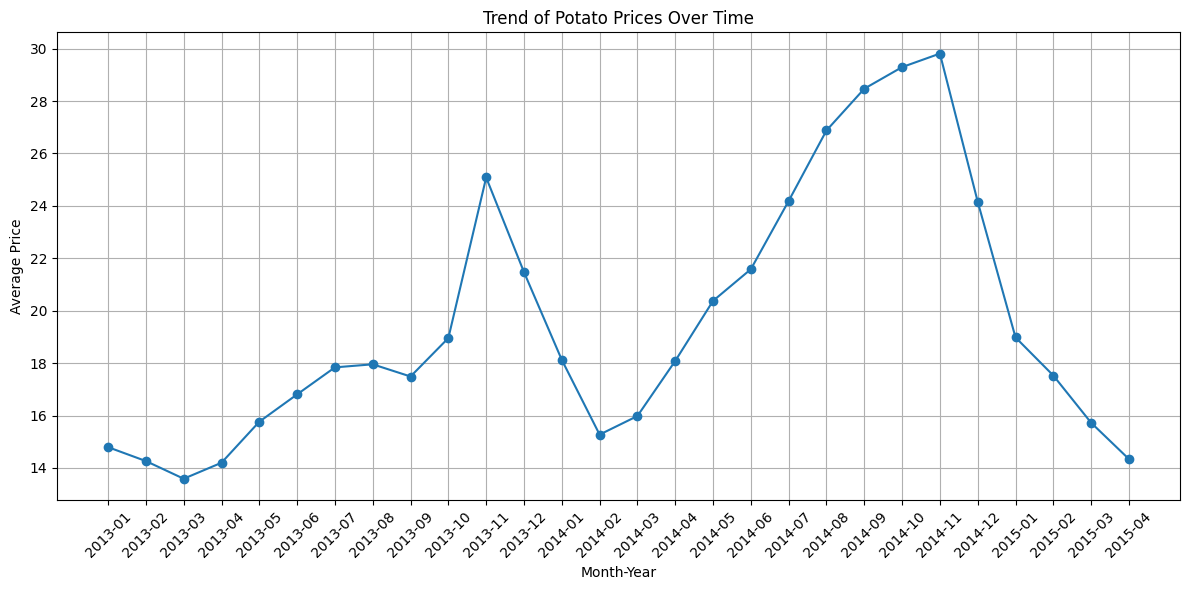

In [10]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d-%m-%Y')

# Extracting the month and year from the 'Date' column
merged_df['Month_Year'] = merged_df['Date'].dt.to_period('M')

# Calculating the average price per month
avg_price_per_month = merged_df.groupby('Month_Year')['Price'].mean().reset_index()

# Plotting the average price per month
plt.figure(figsize=(12, 6))
plt.plot(avg_price_per_month['Month_Year'].astype(str), avg_price_per_month['Price'], marker='o')
plt.title('Trend of Potato Prices Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### INSIGHT:
#### The plot shows the trend of potato prices over time. We can observe fluctuations in prices, with certain periods showing significant spikes. This trend analysis helps identify periods of high and low prices, which can be useful for stakeholders in the potato market.



## 2. Average Potato Prices by State:

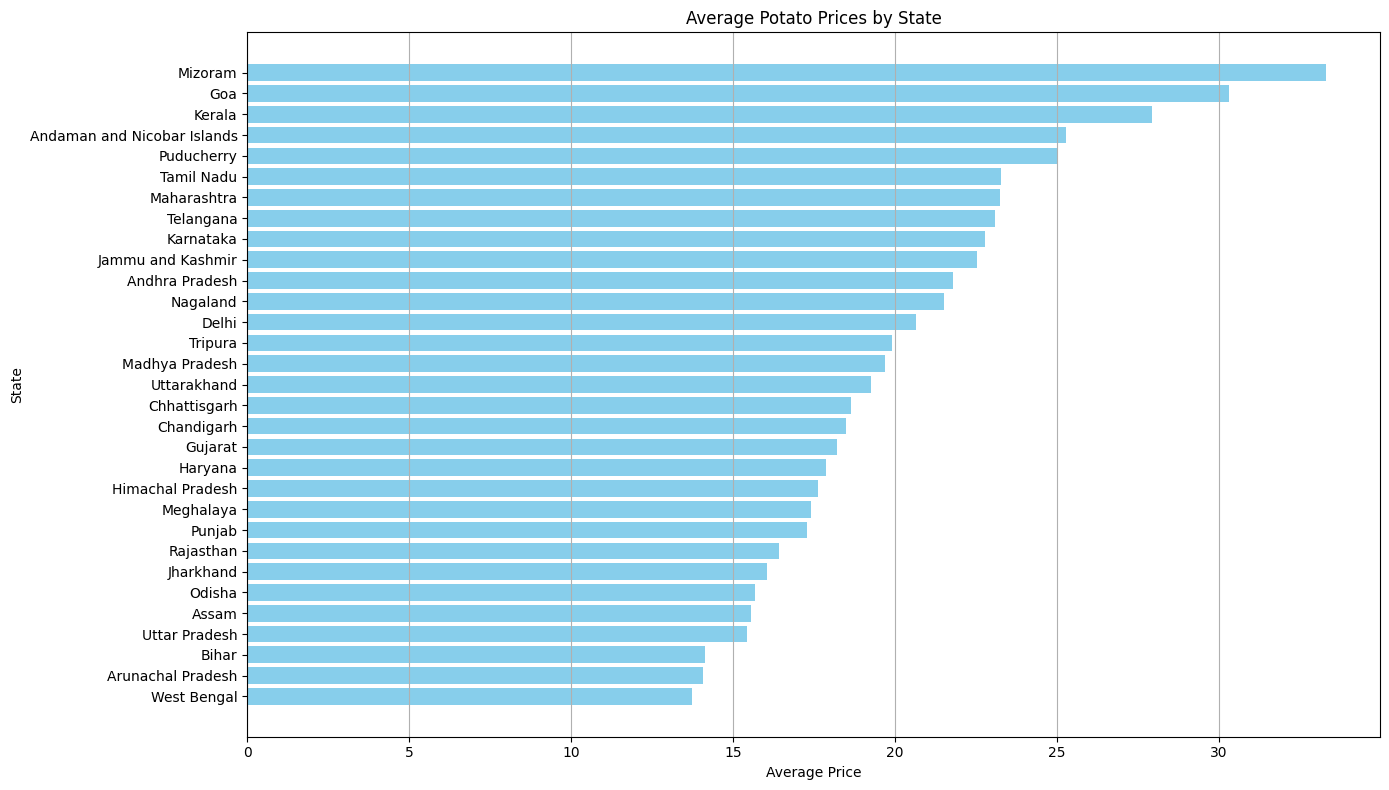

In [11]:
# Calculating the average price per state
avg_price_per_state = merged_df.groupby('State')['Price'].mean().reset_index().sort_values(by='Price', ascending=False)

# Plotting the average price per state
plt.figure(figsize=(14, 8))
plt.barh(avg_price_per_state['State'], avg_price_per_state['Price'], color='skyblue')
plt.title('Average Potato Prices by State')
plt.xlabel('Average Price')
plt.ylabel('State')
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

### INSIGHT:

#### The bar chart shows the average potato prices by state. States like Goa, Kerala, and Mizoram have the highest average potato prices, while states like Delhi, Chandigarh, and Punjab have relatively lower average prices. This analysis helps identify regions with higher costs for potatoes, which can inform pricing strategies and supply chain decisions.

## 3. Variation of Potato Prices by State 

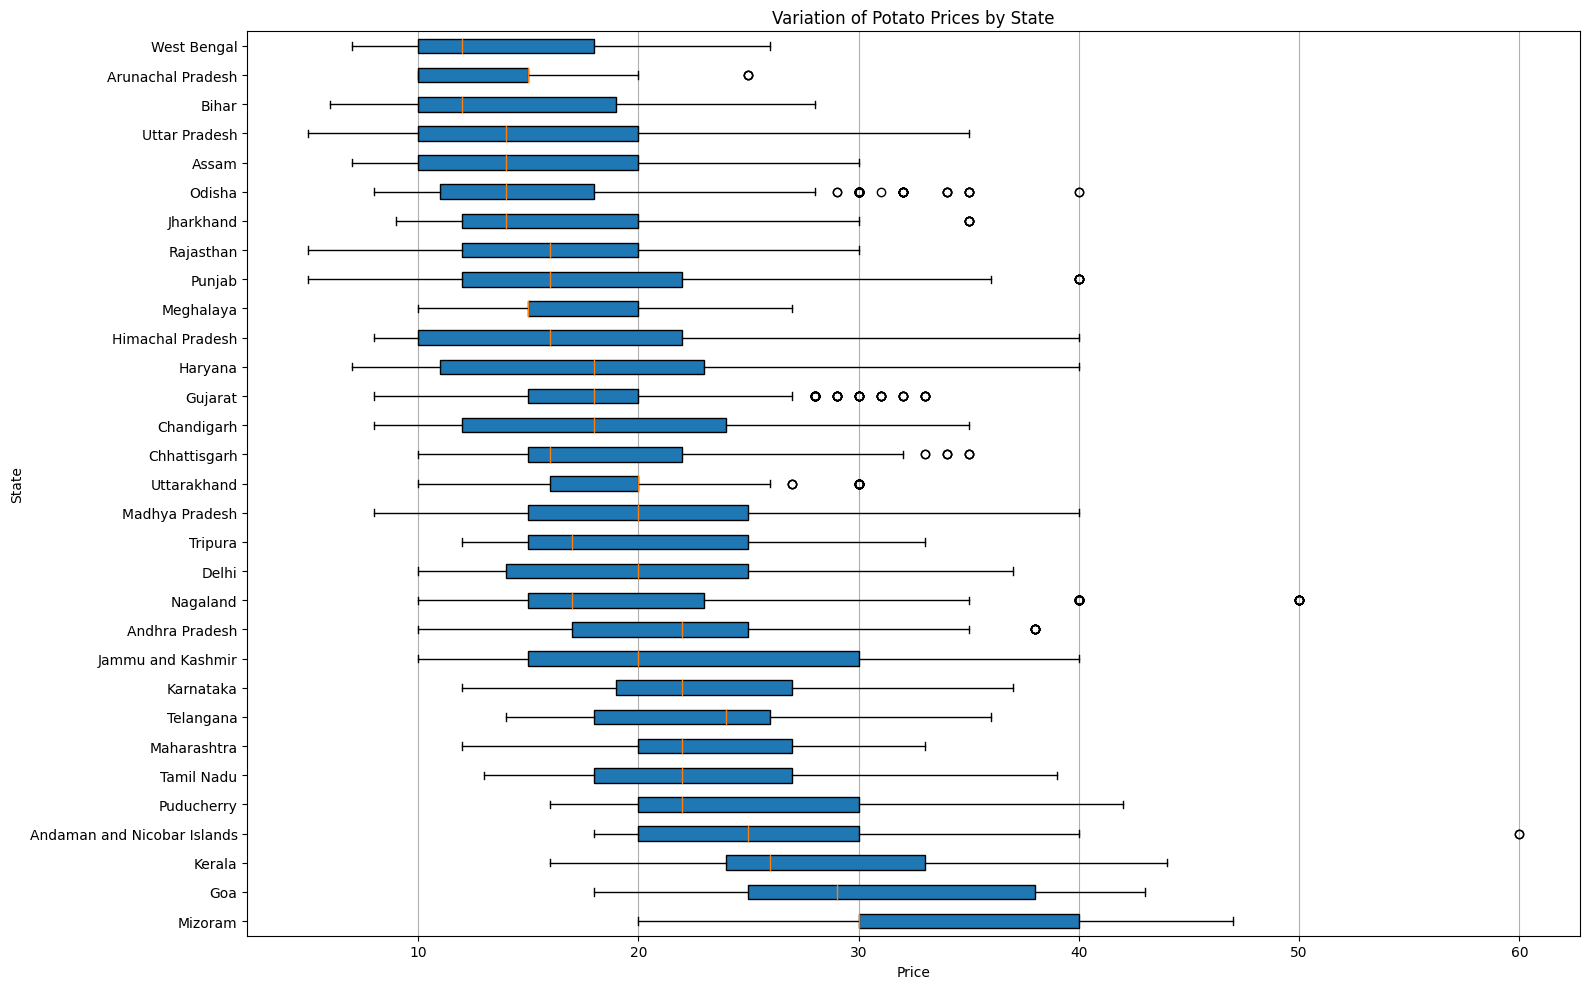

In [12]:
# Plotting the variation of potato prices by state using a box plot
plt.figure(figsize=(16, 10))
plt.boxplot([merged_df[merged_df['State'] == state]['Price'].dropna() for state in avg_price_per_state['State']], vert=False, patch_artist=True)
plt.yticks(range(1, len(avg_price_per_state['State']) + 1), avg_price_per_state['State'])
plt.title('Variation of Potato Prices by State')
plt.xlabel('Price')
plt.ylabel('State')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

### INSIGHT:

#### The box plot shows the variation of potato prices across different states. It highlights the median price, interquartile range, and any outliers. For instance, states like Nagaland, Meghalaya, and Mizoram not only have high average prices but also show significant variability in their prices. This visualization helps in understanding the price dispersion and volatility in different regions.

### 4. Distribution of Potato Prices in Selected States

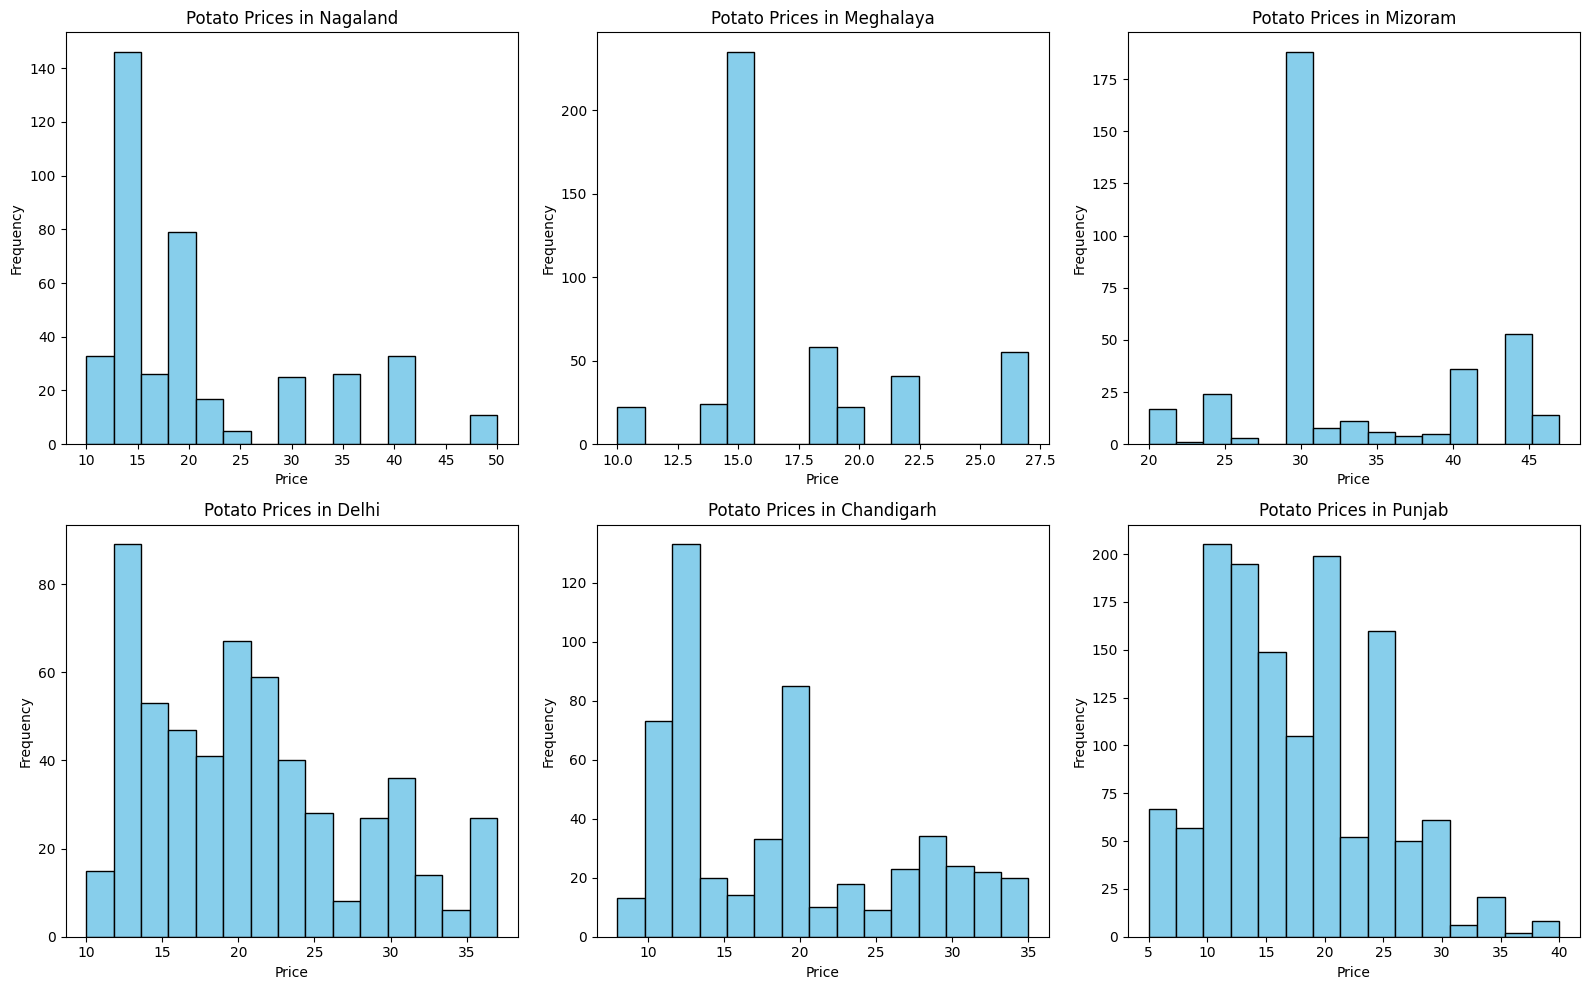

In [13]:
# Plotting the distribution of potato prices for a selection of states
selected_states = ['Nagaland', 'Meghalaya', 'Mizoram', 'Delhi', 'Chandigarh', 'Punjab']

plt.figure(figsize=(16, 10))

for i, state in enumerate(selected_states, 1):
    plt.subplot(2, 3, i)
    plt.hist(merged_df[merged_df['State'] == state]['Price'].dropna(), bins=15, color='skyblue', edgecolor='black')
    plt.title(f'Potato Prices in {state}')
    plt.xlabel('Price')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### INSIGHT:

#### The histograms display the distribution of potato prices in a selection of states. Each plot shows how frequently different price ranges occur within the state. For example, Nagaland and Meghalaya exhibit a wide range of prices, whereas Delhi and Chandigarh have more concentrated price distributions. This information is useful for understanding local market conditions and price stability.

## Conclusion

### Analysis Summary
This project involved a comprehensive analysis of potato prices across various states in India. We started by loading and cleaning two datasets: one containing potato prices by district and another mapping districts to states. After cleaning the data, we merged the datasets to associate each district with its respective state. Our analysis included examining trends in potato prices over time, comparing average prices across states, and exploring the variation and distribution of prices within selected states.

### Tools Used
**Pandas:** For data manipulation and cleaning.

**Matplotlib:** For creating visualizations to identify trends and patterns in the data.

### Short Summary
#### The analysis revealed several key insights:

**Trend Analysis:**  We observed fluctuations in potato prices over time, with certain periods showing significant spikes.

**State Comparisons:** States like Nagaland, Mizoram, and Arunachal Pradesh had the highest average potato prices, while states like Delhi, Chandigarh, and Punjab had lower average prices.

**Price Variation:** We used box plots and histograms to show the distribution and variability of potato prices within different states.

### Learning Outcomes
Through this project, we learned:

**Data Cleaning:** How to handle missing values and clean datasets for analysis.

**Data Merging:** Techniques for merging datasets based on common columns.

**Data Visualization:** Using visualizations to uncover trends, compare groups, and explore distributions.

**Analytical Skills:** Drawing meaningful conclusions from data and effectively communicating findings through visualizations and summaries.

This project demonstrated the power of combining data manipulation and visualization using Python to perform comprehensive data analysis, offering valuable insights that can inform decision-making in agricultural markets and beyond.